
**CH.Yuvarajasimha Reddy (AP21110011248)**

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scikit-multiflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254676 sha256=ddf00208378b7278adec6ac2eec224abec1f4a7ebf8bd2f142f3f1006a1f89ba
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("parkinsons.csv")

In [ ]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
target='status'

In [ ]:
#distribtion of variables
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
columns = data.columns
num_cols = 1
num_rows = (len(columns) + num_cols - 1) // num_cols

# Create separate box plots for each column
plt.figure(figsize=(20, 25))
for i, column in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)  # Create subplots
    sns.countplot(x=data[column])
    plt.title(f'count plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [ ]:
columns = data.columns
num_cols = 2
num_rows = (len(columns) + num_cols - 1) // num_cols

# Create separate box plots for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)  # Create subplots
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

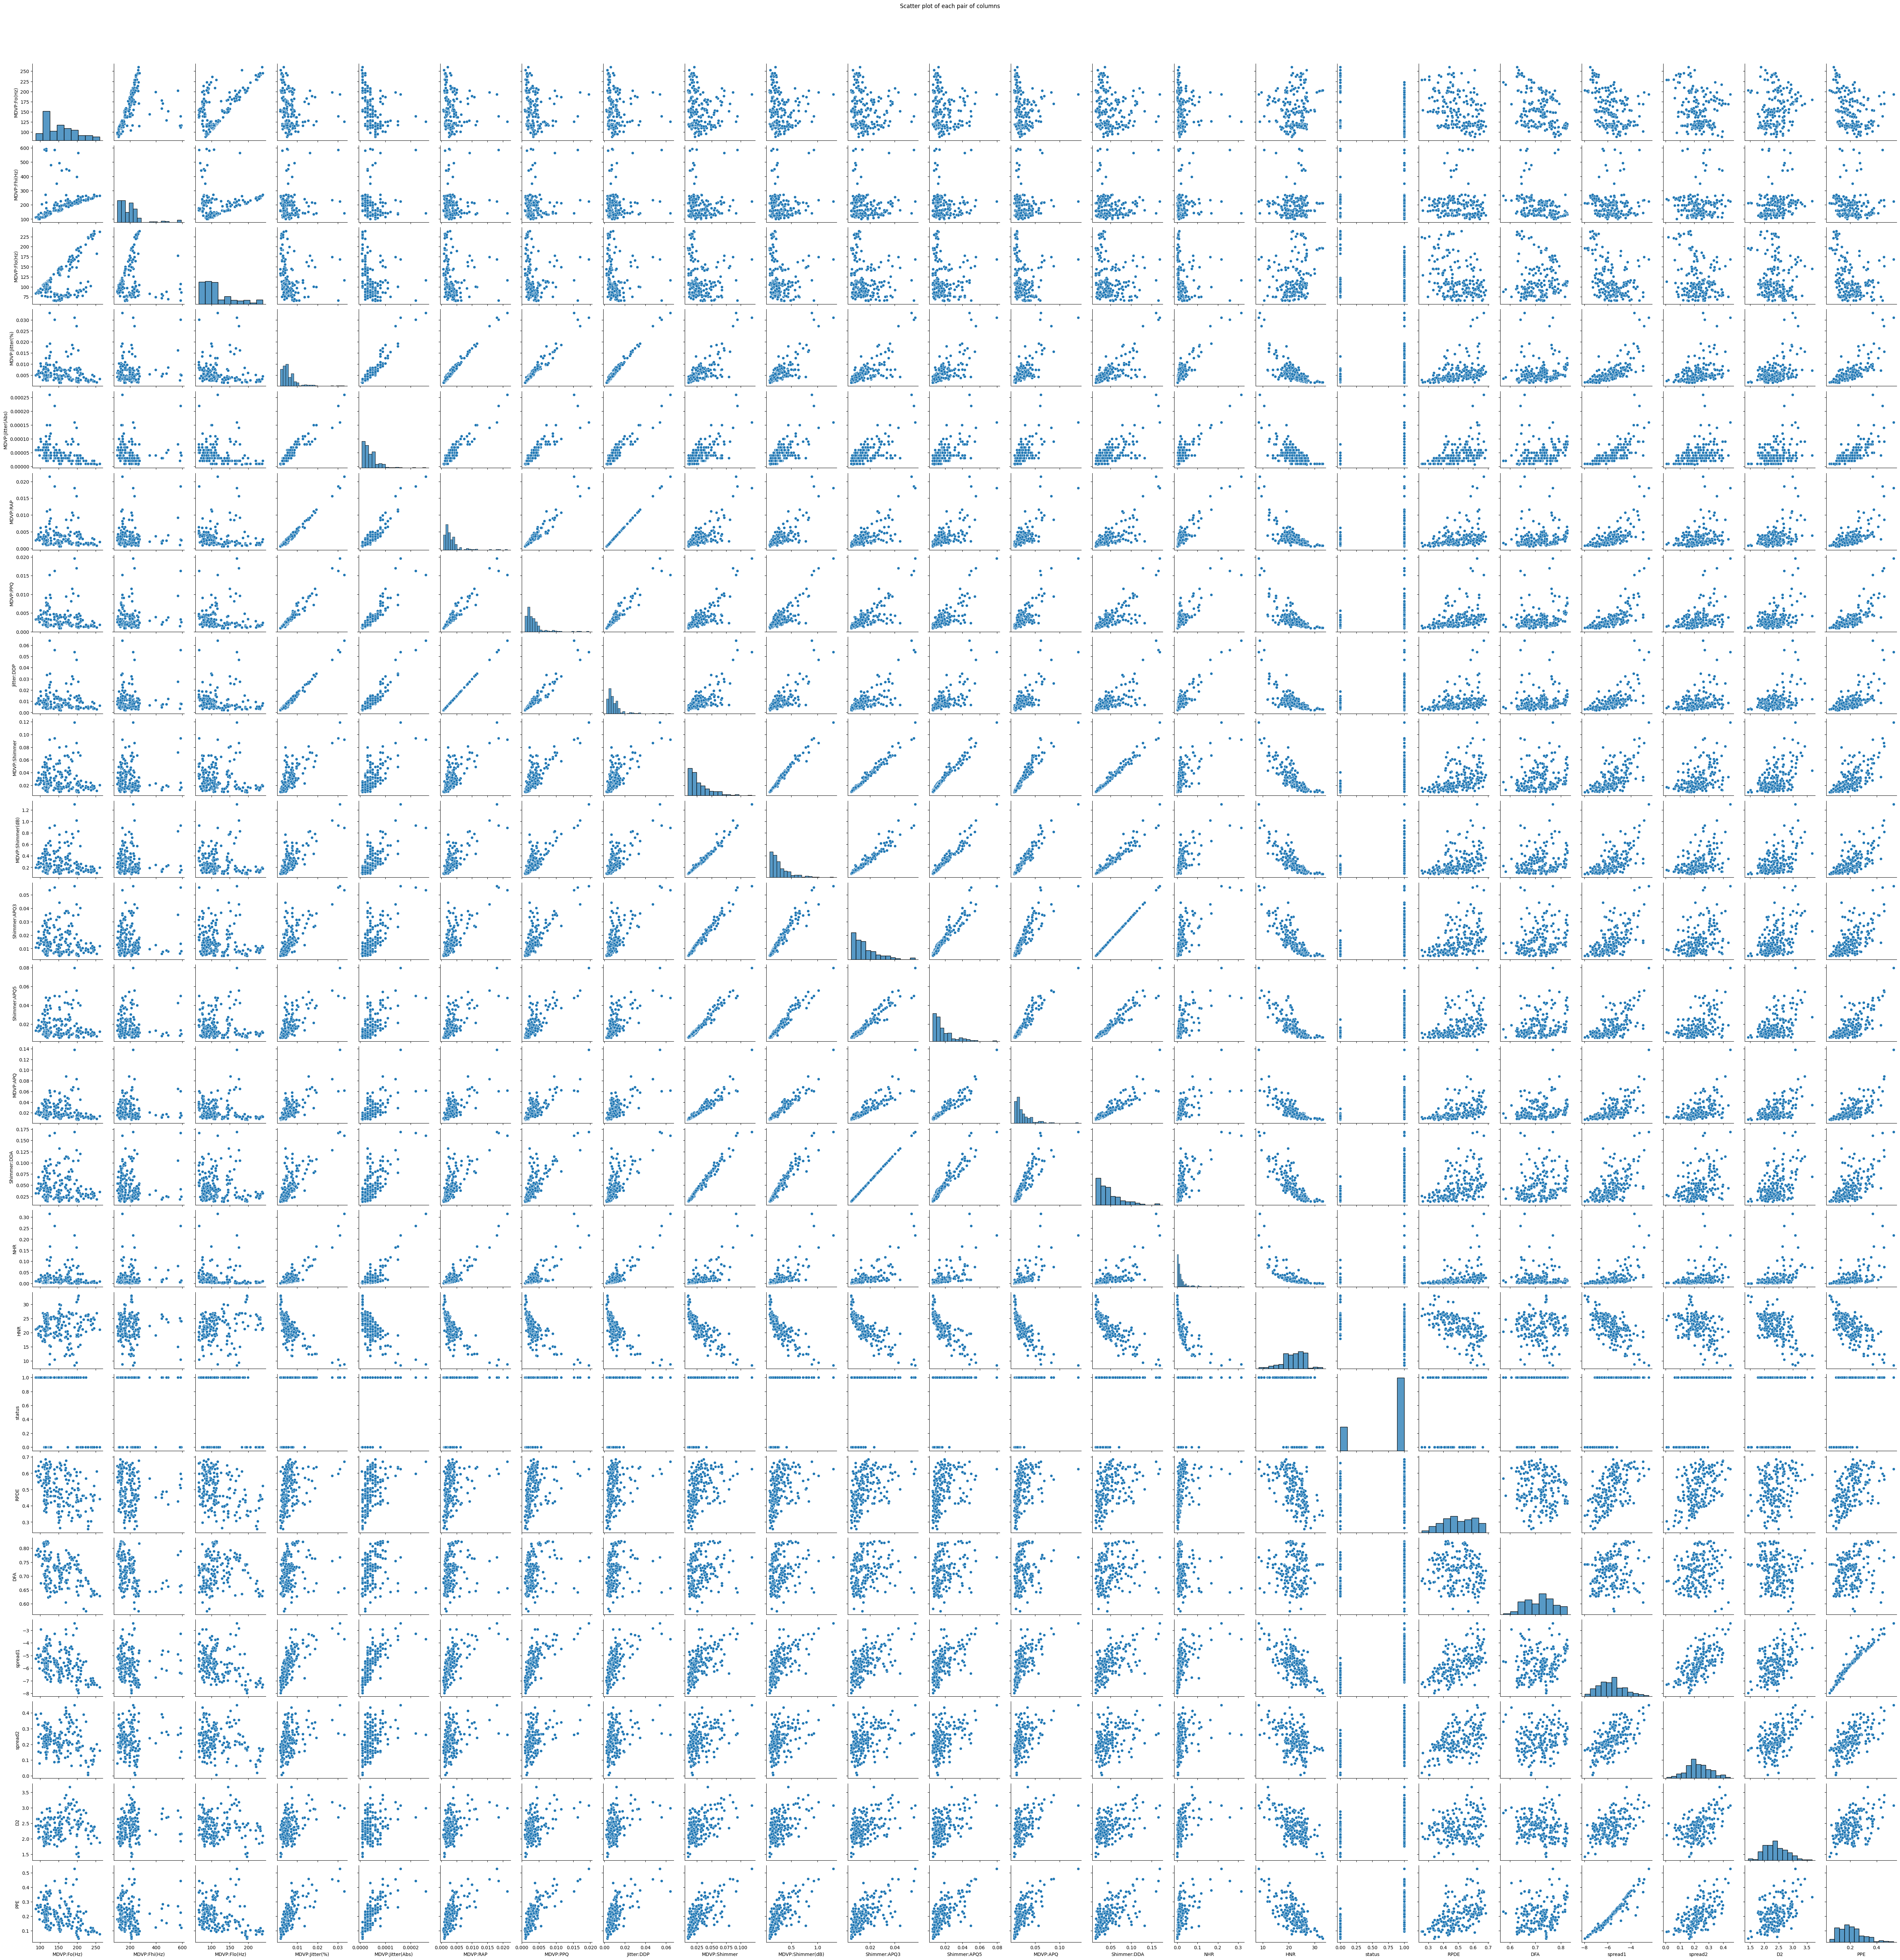

In [ ]:
plt.figure(figsize=(20, 15))
sns.pairplot(data)
plt.suptitle('Scatter plot of each pair of columns', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
corr=X.corr()
sns.heatmap(corr, annot=True,cmap='rainbow')

<Axes: >

In [ ]:

#Data Preprocessing

In [ ]:
X =data.drop(columns=['name','status'],axis=1)
y=data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status'>

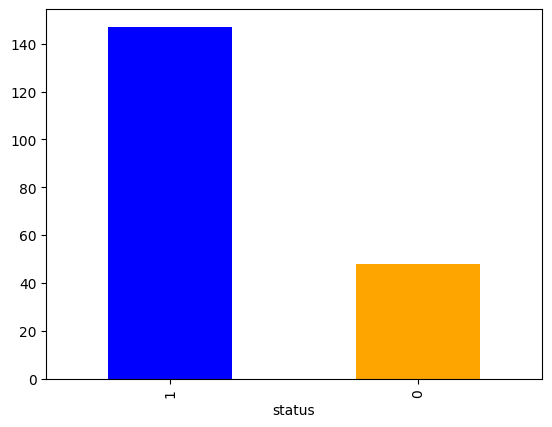

In [ ]:
data['status'].value_counts().plot(kind = 'bar', color = ['blue', 'orange'])

** DATA IMBALANCING**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)

In [ ]:
print("Before SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y == 0)))

X_sm, y_sm = sm.fit_resample(X, y.ravel())



print("After SMOTE, counts of label '1': {}".format(sum(y_sm == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_sm == 0)))


Before SMOTE, counts of label '1': 147
Before SMOTE, counts of label '0': 48 

After SMOTE, counts of label '1': 147
After SMOTE, counts of label '0': 147


In [ ]:
#print(y_res.value_counts())
X_sm.value_counts()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR       HNR        RPDE      DFA       spread1    spread2   D2        PPE     
88.333000    112.240000    84.072000     0.005050        0.000060          0.002540  0.003300  0.007630    0.021430      0.197000          0.010790      0.013420      0.018920  0.032370     0.011660  21.118000  0.611137  0.776156  -5.249770  0.391002  2.407313  0.249740    1
179.711000   225.930000    144.878000    0.007090        0.000040          0.003910  0.004190  0.011720    0.043130      0.442000          0.022970      0.027680      0.034550  0.068920     0.072230  11.866000  0.590951  0.745526  -4.379411  0.375531  3.671155  0.332086    1
197.771998   207.477954    192.634417    0.002746        0.000010          0.001563  0.001596  0.004688    0.011132      0.098586          0.005666      0.006927      0.008266  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X_sm)
y=y_sm

In [ ]:
X.shape

(294, 22)

**FEATURE SELECTION**

In [ ]:
from sklearn import svm
clas = svm.SVC(kernel='linear',gamma='auto',C=2)

In [ ]:
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 12
rfe1 = RFE(clas, n_features_to_select=n_features_to_select)
rfe1.fit(X_sm, y_sm)
X_rfe2 = rfe1.transform(X_sm)

In [ ]:
X_sm.columns[(rfe1.get_support())]

Index(['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
print(X.shape)
print(X_pca.shape)

(294, 22)
(294, 8)


**Feature Generation**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

print(pca_df)
print(type(pca_df))

         PCA1      PCA2
0    1.264698 -0.480024
1    2.017175  0.111547
2    1.706150 -0.104600
3    1.846278 -0.068783
4    2.226169  0.224561
..        ...       ...
289 -0.167387 -0.695074
290 -0.306008 -0.135457
291 -0.331708 -0.845326
292 -1.285527  0.076777
293 -0.148211 -0.316430

[294 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


**Splitting of Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe2, y_sm, test_size = 0.2, random_state = 1)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (235, 12)
Number transactions y_train dataset:  (235,)
Number transactions X_test dataset:  (59, 12)
Number transactions y_test dataset:  (59,)


In [ ]:
print("Number transactions y_test dataset: ", y_test)

Number transactions y_test dataset:  [0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


**Model Selection**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
mod1=KNeighborsClassifier()

In [ ]:
model4=mod1.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.864406779661017
Precision: 0.8928571428571429
Recall: 0.8333333333333334
F1 Score: 0.8620689655172413


In [ ]:
mod=GaussianNB()

In [ ]:
model3=mod.fit(X_train,y_train)

In [ ]:
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8305084745762712
Precision: 0.9545454545454546
Recall: 0.7
F1 Score: 0.8076923076923077


In [ ]:
from sklearn.metrics import confusion_matrix
predictions=model4.predict(X_test)

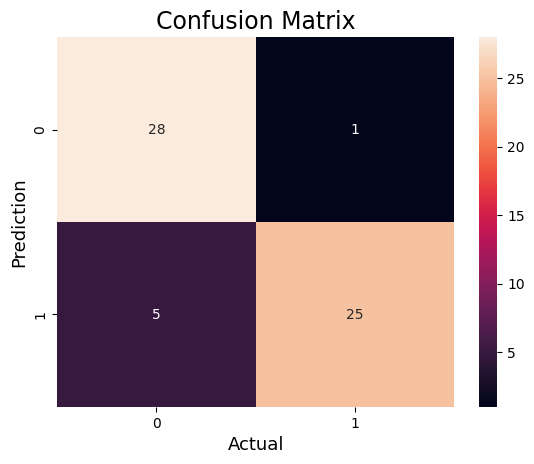

In [ ]:
cm = confusion_matrix(y_test,predictions)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
output = pd.DataFrame({target:predictions})
output.to_csv('submission.csv', index=False)

In [ ]:
dat1=(0.03327,0.348,0.01893,0.0343,0.04322,0.02919,0.631099,0.605417,-2.93107,0.434326,3.007463,0.430788)
dat2=(0.01484,0.133,0.0095,0.0125,0.02261,0.0043,0.36909,0.776158,-6.08557,0.192375,1.889002,0.174152)

In [ ]:
hel=np.asarray(dat1)

datas=hel.reshape(1,-1)

In [ ]:
pred2=model3.predict(datas)
pred4=model4.predict(datas)
print("Gaussian Method : ",pred2)
print("KNN Method : ",pred4)

Gaussian Method :  [1]
KNN Method :  [1]
